In [7]:
import pandas as pd
import numpy as np

In [8]:
my_dates_index = pd.date_range('20250223', periods=6)
my_dates_index

DatetimeIndex(['2025-02-23', '2025-02-24', '2025-02-25', '2025-02-26',
               '2025-02-27', '2025-02-28'],
              dtype='datetime64[ns]', freq='D')

In [9]:
sample_numpy_data = np.array(np.arange(24)).reshape((6,4))
sample_numpy_data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [10]:
sample_df = pd.DataFrame(sample_numpy_data, index=[my_dates_index], columns=list('ABCD'))
#sample_df = pd.DataFrame(sample_numpy_data, index=["1","2","3","4","5","6"], columns=list('ABCD'))
sample_df

,A,B,C,D
2025-02-23,0,1,2,3
2025-02-24,4,5,6,7
2025-02-25,8,9,10,11
2025-02-26,12,13,14,15
2025-02-27,16,17,18,19
2025-02-28,20,21,22,23


##### selection using column name

In [11]:
sample_df['C']

2025-02-23     2
2025-02-24     6
2025-02-25    10
2025-02-26    14
2025-02-27    18
2025-02-28    22
Name: C, dtype: int32

In [12]:
sample_df[['C', 'D']]

,C,D
2025-02-23,2,3
2025-02-24,6,7
2025-02-25,10,11
2025-02-26,14,15
2025-02-27,18,19
2025-02-28,22,23


##### selection using slice
- remember: up to, but not including second index

In [13]:
sample_df[1:3]

,A,B,C,D
2025-02-24,4,5,6,7
2025-02-25,8,9,10,11


##### selection using  index label
- note: last index is included

In [14]:
sample_df['2025-02-25':'2025-02-27']
#sample_df['1':'4']


,A,B,C,D
2025-02-25,8,9,10,11
2025-02-26,12,13,14,15
2025-02-27,16,17,18,19


In [15]:
sample_df.loc['2025-02-25':'2025-02-27':2]

,A,B,C,D
2025-02-25,8,9,10,11
2025-02-27,16,17,18,19


### Selection by label

label-location based indexer for selection by label

In [16]:
my_dates_index[1:5:2]

DatetimeIndex(['2025-02-24', '2025-02-26'], dtype='datetime64[ns]', freq='2D')

In [17]:
sample_df.loc[my_dates_index[1:5:2]]

,A,B,C,D
2025-02-24,4,5,6,7
2025-02-26,12,13,14,15


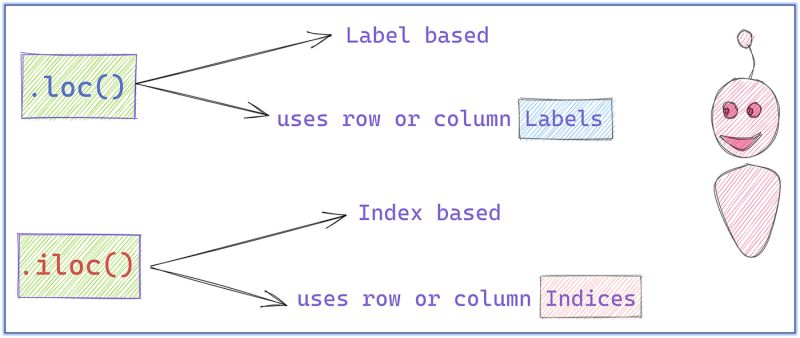

##### Selecting using multi-axis by label


In [22]:
sample_df.loc[:,['B','A'],-1]

IndexError: list index out of range

In [12]:
sample_df.loc[:,'A':'B',-1]

,A,B
2025-02-23,0,1
2025-02-24,4,5
2025-02-25,8,9
2025-02-26,12,13
2025-02-27,16,17
2025-02-28,20,21


##### Reduce number of dimensions for returned object
- notice order of 'D' and 'B'

In [14]:
sample_df.loc['2025-02-25',['D','B']]


,D,B
2025-02-25,11,9


##### using result

### Selection by Position

integer-location based indexing for selection by position

In [15]:
sample_numpy_data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [16]:
sample_numpy_data[3]

array([12, 13, 14, 15])

In [17]:
sample_df

,A,B,C,D
2025-02-23,0,1,2,3
2025-02-24,4,5,6,7
2025-02-25,8,9,10,11
2025-02-26,12,13,14,15
2025-02-27,16,17,18,19
2025-02-28,20,21,22,23


In [19]:
sample_df.iloc[3][0] = 33
sample_df

,A,B,C,D
2025-02-23,0,1,2,3
2025-02-24,4,5,6,7
2025-02-25,8,9,10,11
2025-02-26,33,13,14,15
2025-02-27,16,17,18,19
2025-02-28,20,21,22,23


##### integer slices


In [23]:
sample_df.loc[:,'A':'B',-1]

UnsortedIndexError: 'MultiIndex slicing requires the index to be lexsorted: slicing on levels [1], lexsort depth 1'

In [20]:
sample_df.iloc[1:3, 2:4]

,C,D
2025-02-24,6,7
2025-02-25,10,11


##### lists of integers

In [21]:
sample_df.iloc[[0,1,3], [0,2]]

,A,C
2025-02-23,0,2
2025-02-24,4,6
2025-02-26,33,14


##### slicing rows explicitly
implicitly selecting all columns

In [22]:
sample_df.iloc[1:3,:]

,A,B,C,D
2025-02-24,4,5,6,7
2025-02-25,8,9,10,11


##### slicing columns explicitly
implicitly selecting all rows

In [27]:
sample_df[1:3,:]

TypeError: '(slice(1, 3, None), slice(None, None, None))' is an invalid key

In [23]:
sample_df.iloc[:, 1:3]

,B,C
2025-02-23,1,2
2025-02-24,5,6
2025-02-25,9,10
2025-02-26,13,14
2025-02-27,17,18
2025-02-28,21,22


### Boolean Indexing
##### test based upon one column's data

In [24]:
sample_df

,A,B,C,D
2025-02-23,0,1,2,3
2025-02-24,4,5,6,7
2025-02-25,8,9,10,11
2025-02-26,33,13,14,15
2025-02-27,16,17,18,19
2025-02-28,20,21,22,23


In [28]:
sample_df['C']>= 14

2025-02-23    False
2025-02-24    False
2025-02-25    False
2025-02-26     True
2025-02-27     True
2025-02-28     True
Name: C, dtype: bool

In [29]:
sample_df[sample_df.C >= 14]

,A,B,C,D
2025-02-26,12,13,14,15
2025-02-27,16,17,18,19
2025-02-28,20,21,22,23


In [30]:
sample_df[sample_df['C'] >= 14]

,A,B,C,D
2025-02-26,12,13,14,15
2025-02-27,16,17,18,19
2025-02-28,20,21,22,23


##### test based upon entire data set

In [27]:
sample_df >= 11

,A,B,C,D
2025-02-23,False,False,False,False
2025-02-24,False,False,False,False
2025-02-25,False,False,False,True
2025-02-26,True,True,True,True
2025-02-27,True,True,True,True
2025-02-28,True,True,True,True


In [28]:
sample_df[sample_df >= 11]

,A,B,C,D
2025-02-23,NaN,NaN,NaN,NaN
2025-02-24,NaN,NaN,NaN,NaN
2025-02-25,NaN,NaN,NaN,11.0
2025-02-26,33.0,13.0,14.0,15.0
2025-02-27,16.0,17.0,18.0,19.0
2025-02-28,20.0,21.0,22.0,23.0


##### isin() method

In [31]:
sample_df

,A,B,C,D
2025-02-23,0,1,2,3
2025-02-24,4,5,6,7
2025-02-25,8,9,10,11
2025-02-26,12,13,14,15
2025-02-27,16,17,18,19
2025-02-28,20,21,22,23


In [32]:
sample_df['C'].isin([14,13,12,11,10])

2025-02-23    False
2025-02-24    False
2025-02-25     True
2025-02-26     True
2025-02-27    False
2025-02-28    False
Name: C, dtype: bool

In [31]:
sample_df[sample_df['C'].isin([14,13,12,11,10])]

,A,B,C,D
2025-02-25,8,9,10,11
2025-02-26,33,13,14,15


### Sorting

##### sort by axis

In [32]:
sample_df

,A,B,C,D
2025-02-23,0,1,2,3
2025-02-24,4,5,6,7
2025-02-25,8,9,10,11
2025-02-26,33,13,14,15
2025-02-27,16,17,18,19
2025-02-28,20,21,22,23


In [33]:
sample_df.sort_index(axis=1, ascending=False)

,D,C,B,A
2025-02-23,3,2,1,0
2025-02-24,7,6,5,4
2025-02-25,11,10,9,8
2025-02-26,15,14,13,33
2025-02-27,19,18,17,16
2025-02-28,23,22,21,20


In [34]:
sample_df.sort_index(axis=0, ascending=False)

,A,B,C,D
2025-02-28,20,21,22,23
2025-02-27,16,17,18,19
2025-02-26,33,13,14,15
2025-02-25,8,9,10,11
2025-02-24,4,5,6,7
2025-02-23,0,1,2,3


## sort by data within a column

In [35]:
sample_df.sort_values(by=['B', 'C'], ascending=False)

,A,B,C,D
2025-02-28,20,21,22,23
2025-02-27,16,17,18,19
2025-02-26,33,13,14,15
2025-02-25,8,9,10,11
2025-02-24,4,5,6,7
2025-02-23,0,1,2,3


In [36]:
sample_df.iloc[4]['B'] = 13
sample_df

,A,B,C,D
2025-02-23,0,1,2,3
2025-02-24,4,5,6,7
2025-02-25,8,9,10,11
2025-02-26,33,13,14,15
2025-02-27,16,13,18,19
2025-02-28,20,21,22,23


In [37]:
sample_df.sort_values(by=['B', 'C'], ascending=False)

,A,B,C,D
2025-02-28,20,21,22,23
2025-02-27,16,13,18,19
2025-02-26,33,13,14,15
2025-02-25,8,9,10,11
2025-02-24,4,5,6,7
2025-02-23,0,1,2,3


In [38]:
sample_df.sort_values(by=['B', 'C'], ascending=[False,True])

,A,B,C,D
2025-02-28,20,21,22,23
2025-02-26,33,13,14,15
2025-02-27,16,13,18,19
2025-02-25,8,9,10,11
2025-02-24,4,5,6,7
2025-02-23,0,1,2,3


### Select, Add, Delete, Columns

##### dictionary selection with string index

In [34]:
cookbook_df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]})
cookbook_df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


##### arithmetic vectorized operation using string indices

In [35]:
cookbook_df['BBC']=cookbook_df['BBB'] * cookbook_df['CCC']
cookbook_df

,AAA,BBB,CCC,BBC
0,4,10,100,1000
1,5,20,50,1000
2,6,30,-30,-900
3,7,40,-50,-2000


##### column deletion 

In [36]:
del cookbook_df['BBC']
cookbook_df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [38]:
del cookbook_df[['AAA','CCC']]
cookbook_df

TypeError: '['AAA', 'CCC']' is an invalid key

In [39]:
last_column = cookbook_df.pop('CCC')

last_column

0    100
1     50
2    -30
3    -50
Name: CCC, dtype: int64

In [40]:
cookbook_df

,AAA,BBB
0,4,10
1,5,20
2,6,30
3,7,40


##### add a new column using a Python list

In [41]:
cookbook_df['DDD'] = [32, 21, 43, 5.0]
cookbook_df

,AAA,BBB,DDD
0,4,10,32.0
1,5,20,21.0
2,6,30,43.0
3,7,40,5.0


In [42]:
cookbook_df.dtypes

AAA      int64
BBB      int64
DDD    float64
dtype: object

##### insert function

In [44]:
cookbook_df.insert(0, "new column2", [3,4,5,6])

cookbook_df

,new column2,new column,AAA,BBB,DDD
0,3,3,4,10,32.0
1,4,4,5,20,21.0
2,5,5,6,30,43.0
3,6,6,7,40,5.0


In [45]:
cookbook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   new column2  4 non-null      int64  
 1   new column   4 non-null      int64  
 2   AAA          4 non-null      int64  
 3   BBB          4 non-null      int64  
 4   DDD          4 non-null      float64
dtypes: float64(1), int64(4)
memory usage: 288.0 bytes


In [46]:
cookbook_df = cookbook_df.drop('DDD', axis=1)
cookbook_df

,new column2,new column,AAA,BBB
0,3,3,4,10
1,4,4,5,20
2,5,5,6,30
3,6,6,7,40


In [54]:
#cookbook_df = cookbook_df.drop('AAA', axis=1)
cookbook_df.drop(['new column','new column2'], axis=1, inplace=True)
cookbook_df

,AAA,BBB
0,4,10
1,5,20
2,6,30
3,7,40
